In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import os
from glob import glob
from PIL import Image

In [2]:
skin_dataframe = pd.read_csv('data/HAM10000_metadata.csv')

In [3]:
base_skin_dir = 'data/'
skin_image_Path = {os.path.splitext(os.path.basename(x))[0]: x
                        for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}
print (skin_image_Path)


{'ISIC_0026784': 'data/HAM10000_images_part_1/ISIC_0026784.jpg', 'ISIC_0028971': 'data/HAM10000_images_part_1/ISIC_0028971.jpg', 'ISIC_0026948': 'data/HAM10000_images_part_1/ISIC_0026948.jpg', 'ISIC_0026790': 'data/HAM10000_images_part_1/ISIC_0026790.jpg', 'ISIC_0028965': 'data/HAM10000_images_part_1/ISIC_0028965.jpg', 'ISIC_0025299': 'data/HAM10000_images_part_1/ISIC_0025299.jpg', 'ISIC_0024839': 'data/HAM10000_images_part_1/ISIC_0024839.jpg', 'ISIC_0024811': 'data/HAM10000_images_part_1/ISIC_0024811.jpg', 'ISIC_0026960': 'data/HAM10000_images_part_1/ISIC_0026960.jpg', 'ISIC_0028795': 'data/HAM10000_images_part_1/ISIC_0028795.jpg', 'ISIC_0026974': 'data/HAM10000_images_part_1/ISIC_0026974.jpg', 'ISIC_0028781': 'data/HAM10000_images_part_1/ISIC_0028781.jpg', 'ISIC_0028959': 'data/HAM10000_images_part_1/ISIC_0028959.jpg', 'ISIC_0024805': 'data/HAM10000_images_part_1/ISIC_0024805.jpg', 'ISIC_0025528': 'data/HAM10000_images_part_1/ISIC_0025528.jpg', 'ISIC_0024636': 'data/HAM10000_images_p

In [4]:
skin_dataframe['path'] = skin_dataframe['image_id'].map(skin_image_Path.get)
skin_dataframe['image'] = skin_dataframe['path'].map(lambda x: np.array(Image.open(x).resize((32,32))))

In [5]:
print(skin_dataframe.head())

     lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

                                           path  \
0  data/HAM10000_images_part_1/ISIC_0027419.jpg   
1  data/HAM10000_images_part_1/ISIC_0025030.jpg   
2  data/HAM10000_images_part_1/ISIC_0026769.jpg   
3  data/HAM10000_images_part_1/ISIC_0025661.jpg   
4  data/HAM10000_images_part_2/ISIC_0031633.jpg   

                                               image  
0  [[[191, 152, 192], [194, 154, 193], [196, 152,...  
1  [[[24, 14, 29], [56, 39, 64], [106, 80, 112], ...  
2  [[[190, 136, 150], [199, 145, 161], [200, 141,...  
3  [[[35, 18, 28], [83, 51, 64], [128, 88, 103], ...

In [6]:
print(skin_dataframe['dx'].value_counts())

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


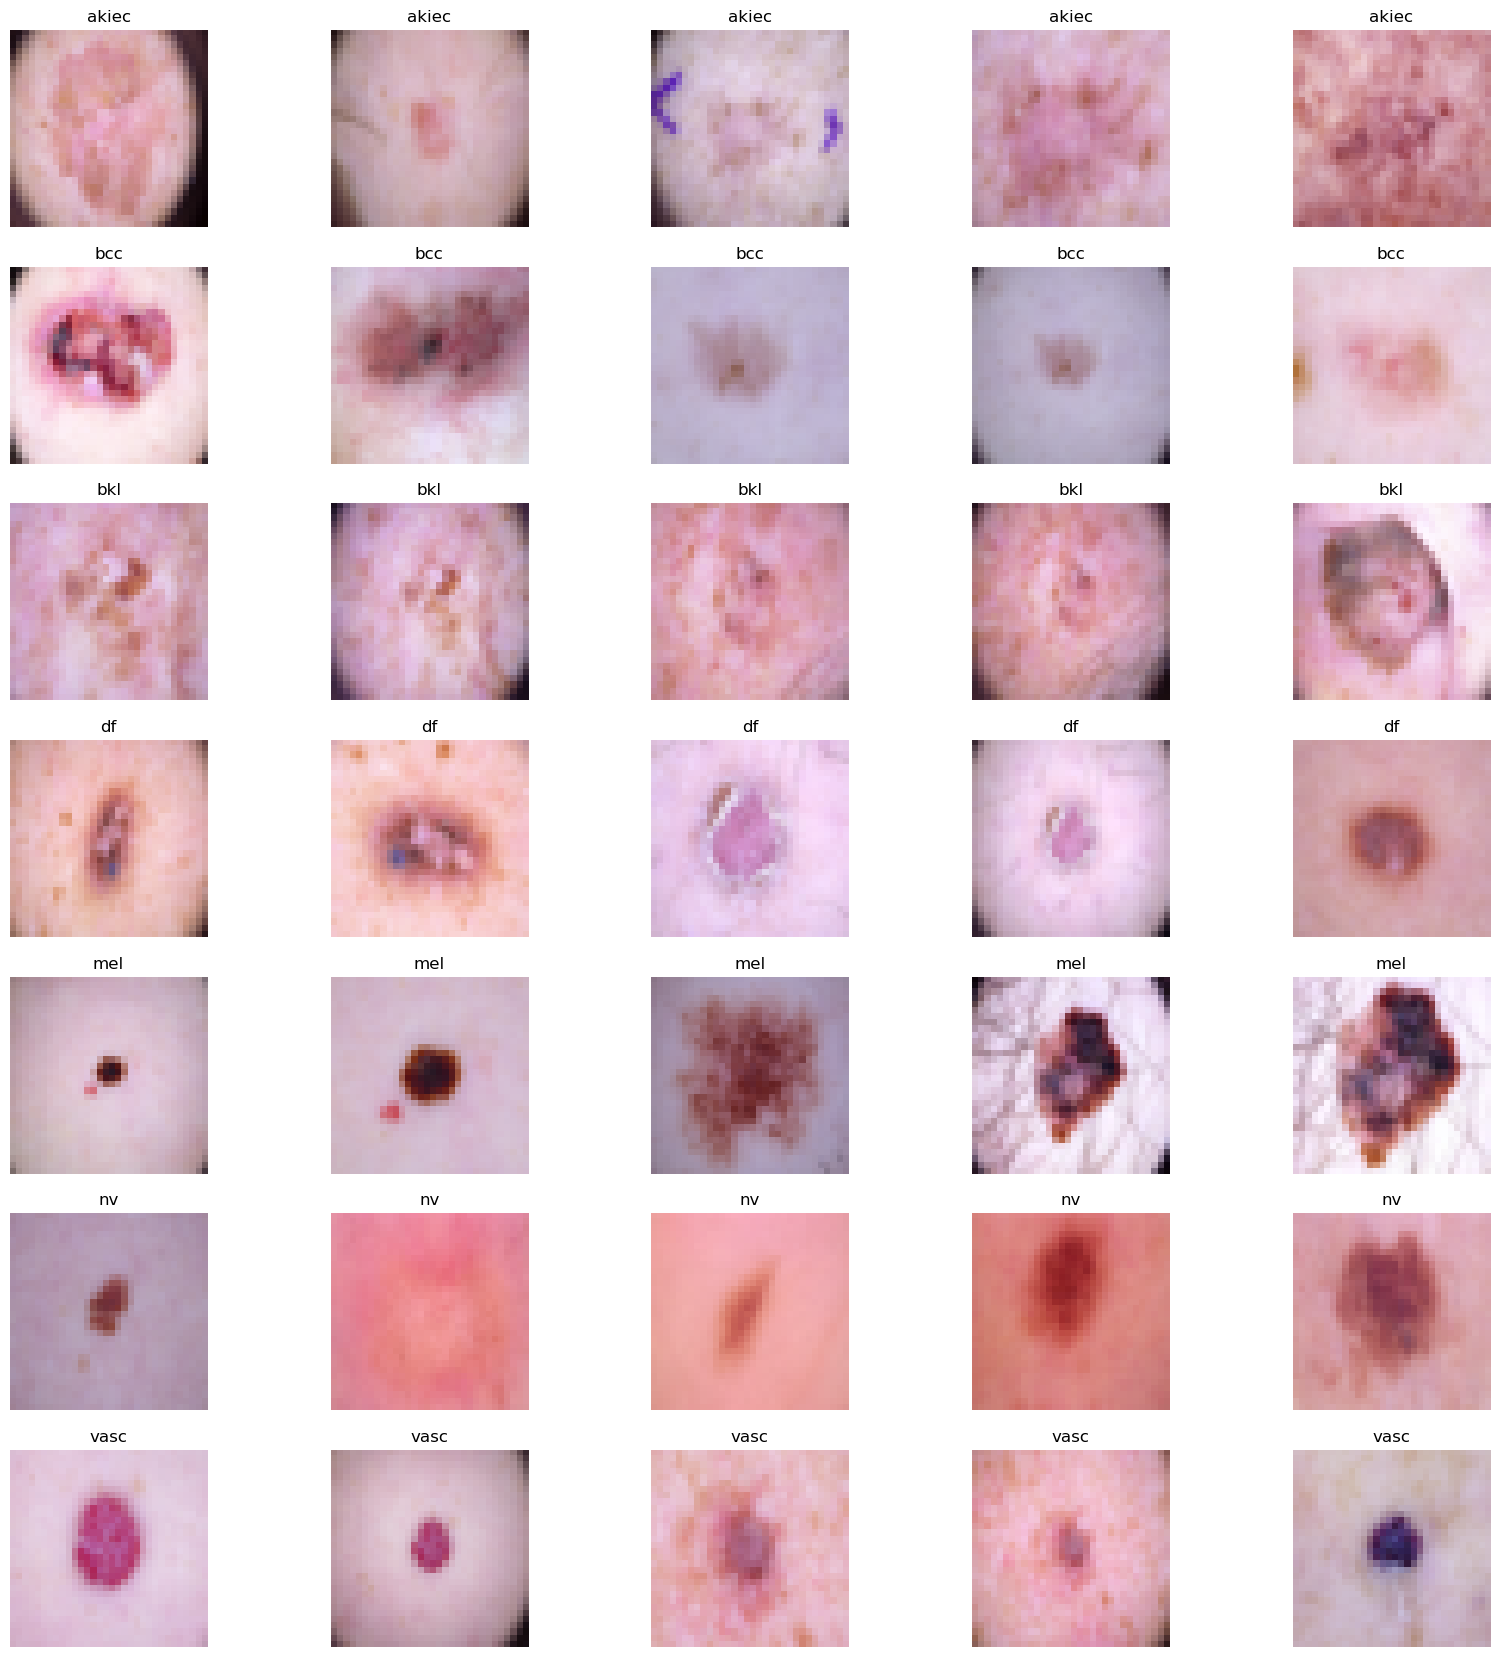

In [7]:
n_samples = 5
fig, maxs = plt.subplots(7, n_samples, figsize=(4*n_samples, 3*7))
for n_axis, (dx, group_df) in enumerate(skin_dataframe.groupby('dx')):
    for sample_idx in range(n_samples):
        axi = maxs[n_axis, sample_idx]
        axi.imshow(group_df.iloc[sample_idx]['image'])
        axi.set_title(f"{dx}")
        axi.axis('off')